In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

# Load pre-trained VGG16 model without top layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 192, 3))

# Freeze the lower layers of VGG16
for layer in vgg16.layers[:-4]:
    layer.trainable = False

# Add custom layers on top
x = vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)  # Softmax for multi-class classification

# Create the model
vgg16_model = Model(inputs=vgg16.input, outputs=output)

# Compile the model
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2  # 20% data for validation
)

# Use the same directory structure for training and validation
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Garbage Segregation Dataset',
    target_size=(256, 192),
    batch_size=64,
    class_mode='categorical',  # Automatically uses folder names as classes
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Garbage Segregation Dataset',
    target_size=(256, 192),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)

# Train the model
history = vgg16_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping, reduce_lr]
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Found 2163 images belonging to 5 classes.
Found 538 images belonging to 5 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 2225s 57s/step - accuracy: 0.3070 - loss: 1.5730 - val_accuracy: 0.4926 - val_loss: 1.1525 - learning_rate: 1.0000e-04
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1856s 54s/step - accuracy: 0.5591 - loss: 1.1307 - val_accuracy: 0.6283 - val_loss: 0.9520 - learning_rate: 1.0000e-04
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1991s 57s/step - accuracy: 0.6529 - loss: 0.9058 - val_accuracy: 0.5874 - val_loss: 1.0419 - learning_rate: 1.0000e-04
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2102s 62s/step - accuracy: 0.7031 - loss: 0.8423 - val_accuracy: 0.6636 - val_loss: 0.8913 - learning_rate: 1.0000e-04
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1946s 56s/step - accuracy: 0.7231 - loss: 0.7584 - val_accuracy: 0.6729 - val_loss: 0.8847 - learning_rate: 1.0000e-04
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1875s 55s/step - accuracy: 0.7590 - loss: 0.6903 - val_accuracy: 0.7249 - val_loss: 0.7296 - learning_rate: 1.0000e-04
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2009s 59s/step - accuracy: 0.76

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vgg16_model.save('/content/drive/MyDrive/FINALgarbage_seg_vgg16_model.h5')

NameError: name 'vgg16_model' is not defined

In [ ]:
# Print training and validation accuracy
train_acc = history.history['accuracy'][-1]  # Last epoch training accuracy

print(f"Final Accuracy: {train_acc:.2%}")


Final Accuracy: 80.86%


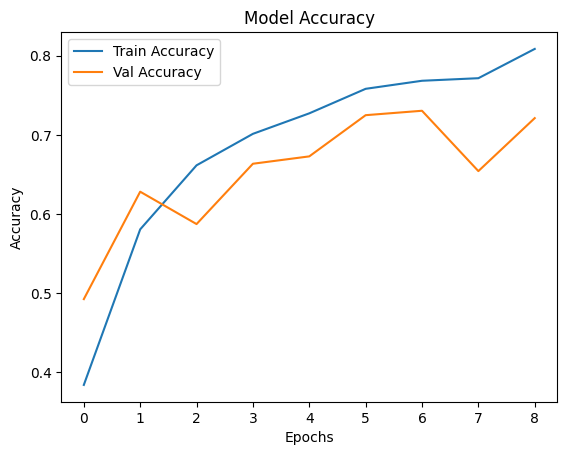

In [ ]:
# Plot accuracy and loss graphs (optional)
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

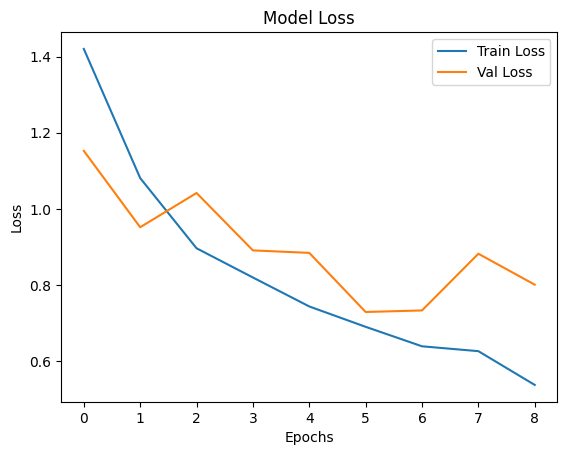

In [ ]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import os
print('Model saved:', os.path.exists('/content/drive/MyDrive/FINALgarbage_seg_vgg16_model.h5'))


Model saved: True


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image
import gradio as gr

# Load the trained model (ensure the path is correct)
model = load_model('/content/drive/MyDrive/FINALgarbage_seg_vgg16_model.h5', compile=False)

# Class labels
class_labels = ['Cloth', 'Glass', 'Other', 'Paper', 'Plastic']

# Function to preprocess image and make predictions
def classify_image(image):
    img = Image.fromarray(image)
    img = img.resize((192, 256))  # Resize to match input shape
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return class_labels[predicted_class]

# Gradio Interface
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Textbox(),
    title="Garbage Material Classification",
    description="Upload an image of garbage, and the model will classify it as Cloth, Glass, Paper, Plastic, or Other."
)

# Launch the Gradio app
interface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9b2c7ec9a588c88e7a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9b2c7ec9a588c88e7a.gradio.live
